# Introduction to Population Games using Python

In [4]:
# Import required modules
import numpy as np
import matplotlib.pyplot as plt

Here, we consider the single population case for simplicity.

In [1]:
N = 1000    # Number of agents in the population
n = 3       # Number of available strategies

In [12]:
# Definition of the fitness vector (example)
A = np.array([[0, -1, 1], 
              [1, 0, -1], 
              [-1, 1, 0]]) # Game: Rock, Paper, Scissors

def fitness(x):
    return np.dot(A, x).reshape(n, 1)

In [10]:
# Definition of the revision protocol (example)
nu = 10 # Saturation parameter
def revision_protocol(x, p):
    return np.clip(p.reshape(n, 1) - p.reshape(1, n), 0, nu) # Example: saturated pairwise comparison

array([[0, 0, 0],
       [1, 0, 0],
       [2, 1, 0]])

#### Simulation of the mean dynamics (EDM: Evolutionary Dynamics Model)

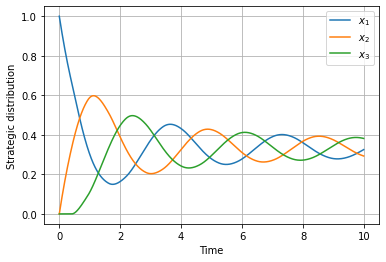

In [39]:
T = 10                  # Simulation time
dt = 1e-2               # Step size
num_iter = int(T/dt)    # Number of iterations

# Mean dynamics
x = np.array([1,0,0]).reshape(n,1) # Initial condition
x_log = np.zeros((n, num_iter))
for k in range(num_iter):
    x_log[:, k] = x.reshape(-1)
    p = fitness(x) # Payoff vector (memoryless)
    revs = revision_protocol(x, p)
    dx = np.sum(x.T*revs - x*revs.T, 1).reshape(n, 1) 
    x = x + dt*dx

# Plot results
time = np.arange(num_iter)*dt
plt.figure(1)
for i in range(n):
    plt.plot(time, x_log[i, :], label=r'$x_'+str(i+1)+r'$')
plt.grid()
plt.xlabel('Time')
plt.ylabel('Strategic distribution')
plt.legend();

#### Simulation of the finite population (microscopic decision-making process)